In [54]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [55]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams

In [56]:
movie_data = pd.read_csv('/content/drive/My Drive/Datasets/The Movies Dataset/movies.csv', header=0)
movie_data = movie_data.replace({np.nan : None})
movie_data.head(5)

,id,title,tagline,description,genres,keywords,date,collection,runtime,revenue,budget,director,cast,production_companies,production_countries,popularity,average_vote,num_votes,language,imdb_id,poster_url
0,862,Toy Story,None,"Led by Woody, Andy's toys live happily in his ...","animation, comedy, family","jealousy, toy, boy, friendship, friends, rival...",1995-10-30,Toy Story Collection,81,3.73554e+08,30000000,John Lasseter,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",Pixar Animation Studios,United States of America,21.9469,7.7,5415,en,tt0114709,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg
1,8844,Jumanji,Roll the dice and unleash the excitement!,When siblings Judy and Peter discover an encha...,"adventure, fantasy, family","board game, disappearance, based on children's...",1995-12-15,None,104,2.62797e+08,65000000,Joe Johnston,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...","TriStar Pictures, Teitler Film, Interscope Com...",United States of America,17.0155,6.9,2413,en,tt0113497,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg
2,15602,Grumpier Old Men,Still Yelling. Still Fighting. Still Ready for...,A family wedding reignites the ancient feud be...,"romance, comedy","fishing, best friend, duringcreditsstinger, ol...",1995-12-22,Grumpy Old Men Collection,101,0,0,Howard Deutch,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...","Warner Bros., Lancaster Gate",United States of America,11.7129,6.5,92,en,tt0113228,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg
3,31357,Waiting to Exhale,Friends are the people who let you be yourself...,"Cheated on, mistreated and stepped on, the wom...","comedy, drama, romance","based on novel, interracial relationship, sing...",1995-12-22,None,127,8.14522e+07,16000000,Forest Whitaker,"Whitney Houston, Angela Bassett, Loretta Devin...",Twentieth Century Fox Film Corporation,United States of America,3.85949,6.1,34,en,tt0114885,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg
4,11862,Father of the Bride Part II,Just When His World Is Back To Normal... He's ...,Just when George Banks has recovered from his ...,comedy,"baby, midlife crisis, confidence, aging, daugh...",1995-02-10,Father of the Bride Collection,106,7.65789e+07,0,Charles Shyer,"Steve Martin, Diane Keaton, Martin Short, Kimb...","Sandollar Productions, Touchstone Pictures",United States of America,8.38752,5.7,173,en,tt0113041,/e64sOI48hQXyru7naBFyssKFxVd.jpg


In [57]:
# Total number of movies
print(f"Total number of movies {len(movie_data)}")

Total number of movies 46628


Total number of unique_genres 20 from 93342 occurences


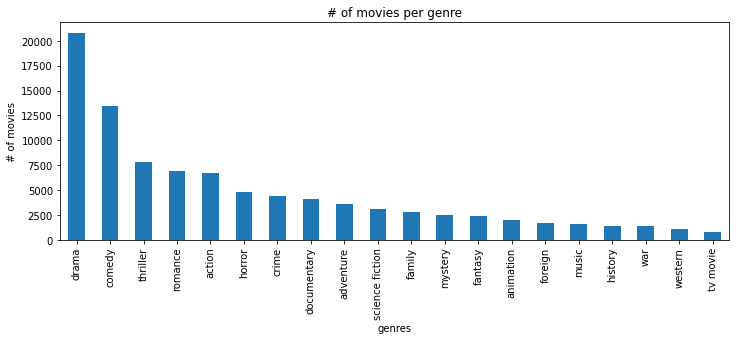

In [58]:
all_genres = [s.split(", ") for s in movie_data[movie_data.genres.notnull()].genres]
genres = [item for l in all_genres for item in l]
unique_genres = set(genres)
print(f"Total number of unique_genres {len(unique_genres)} from {len(genres)} occurences")
pd.Series(genres).value_counts().plot(kind ='bar', figsize=(12, 4))
plt.title('# of movies per genre')
plt.ylabel('# of movies')
plt.xlabel('genres')
plt.show()

* As you can see, Drama genre has more movie count than any other genres.
* Tv movie genre has the lowest number of movies.

In [59]:
def get_year(date):
  year = None
  if date:
    year = date[:4]
  return year

In [60]:
movie_data['year'] = movie_data.date.apply(get_year)

Total of 135 unique years from 1874 to 2020


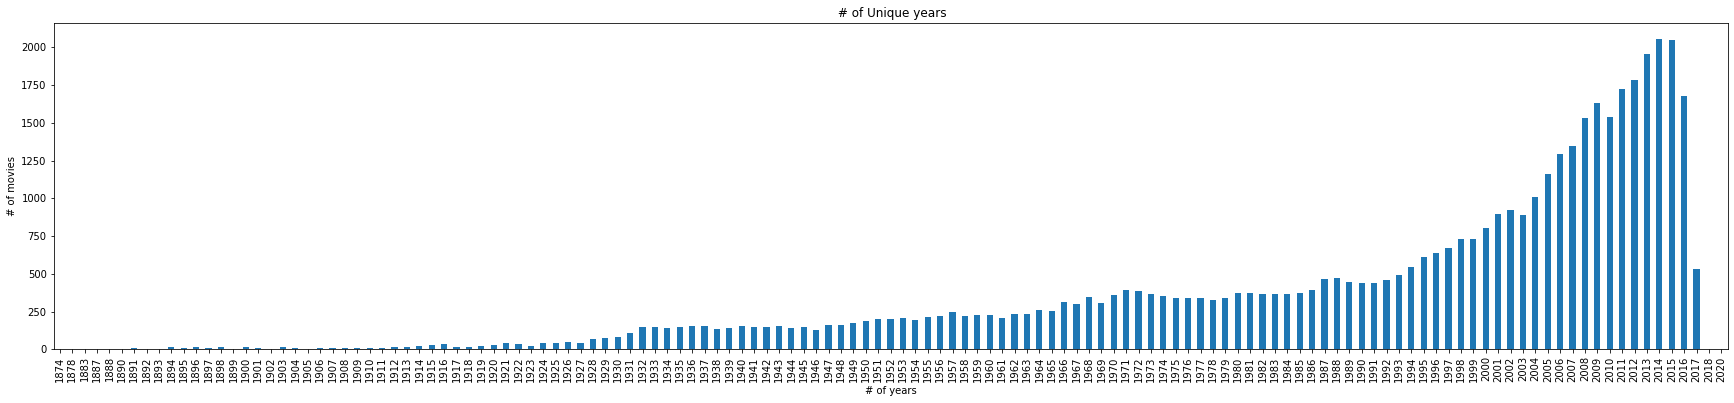

In [61]:
years = movie_data[movie_data.year.notnull()].year
print(f"Total of {len(set(years))} unique years from {min(years)} to {max(years)}")
pd.Series(years).value_counts().sort_index().plot(kind='bar', figsize=(30, 6))
plt.title(' # of Unique years')
plt.ylabel('# of movies')
plt.xlabel('# of years')
plt.show()

In [62]:
sorted_by_popularity = movie_data.sort_values(by='popularity', ascending=False)
print(f"Popular movies\n {sorted_by_popularity['title'].values[:10]}")

Popular movies
 ['Minions' 'Wonder Woman' 'Beauty and the Beast' 'Baby Driver'
 'Big Hero 6' 'Deadpool' 'Guardians of the Galaxy Vol. 2' 'Avatar'
 'John Wick' 'Gone Girl']


In [63]:
# Get poster image
from IPython.core.display import display, HTML
prefix_url = 'http://image.tmdb.org/t/p/'
poster_sizes = ["w92", "w154", "w185", "w342", "w500", "w780", "original"]
full_url = prefix_url + poster_sizes[2] + movie_data.poster_url[0]
display(HTML(f'<img src="{full_url}">'))

In [64]:
# Load ratings
ratings = pd.read_csv("/content/drive/My Drive/Datasets/The Movies Dataset/ratings_small.csv", header=0)
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


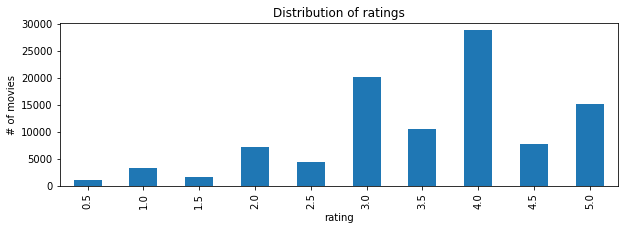

In [65]:
print(ratings['rating'].describe())
pd.Series(ratings['rating'].value_counts().sort_index().plot(kind='bar', figsize=(10, 3)))
plt.title("Distribution of ratings")
plt.ylabel("# of movies")
plt.xlabel("rating")
plt.show()

In [66]:
director_popularity = movie_data.sort_values(by='popularity', ascending=False)
print(f"Popular directors\n {director_popularity['director'].values[:10]}")

Popular directors
 ['Kyle Balda' 'Patty Jenkins' 'Bill Condon' 'Edgar Wright'
 'Chris Williams' 'Tim Miller' 'James Gunn' 'James Cameron'
 'Chad Stahelski' 'David Fincher']


In [67]:
popular_production_companies = movie_data.sort_values(by='popularity', ascending = False)
print(f"Popular production companies\n {popular_production_companies['production_companies'].values[:5]}")

Popular production companies
 ['Universal Pictures, Illumination Entertainment'
 'Dune Entertainment, Atlas Entertainment, Warner Bros., DC Entertainment, Cruel & Unusual Films, TENCENT PICTURES, Wanda Pictures'
 'Walt Disney Pictures, Mandeville Films'
 'Big Talk Productions, TriStar Pictures, Media Rights Capital, Working Title Films, Double Negative'
 'Walt Disney Pictures, Walt Disney Animation Studios']


In [68]:
print(movie_data['title'].head(20).values)

['Toy Story' 'Jumanji' 'Grumpier Old Men' 'Waiting to Exhale'
 'Father of the Bride Part II' 'Heat' 'Sabrina' 'Tom and Huck'
 'Sudden Death' 'GoldenEye' 'The American President'
 'Dracula: Dead and Loving It' 'Balto' 'Nixon' 'Cutthroat Island' 'Casino'
 'Sense and Sensibility' 'Four Rooms' 'Ace Ventura: When Nature Calls'
 'Money Train']


In [69]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


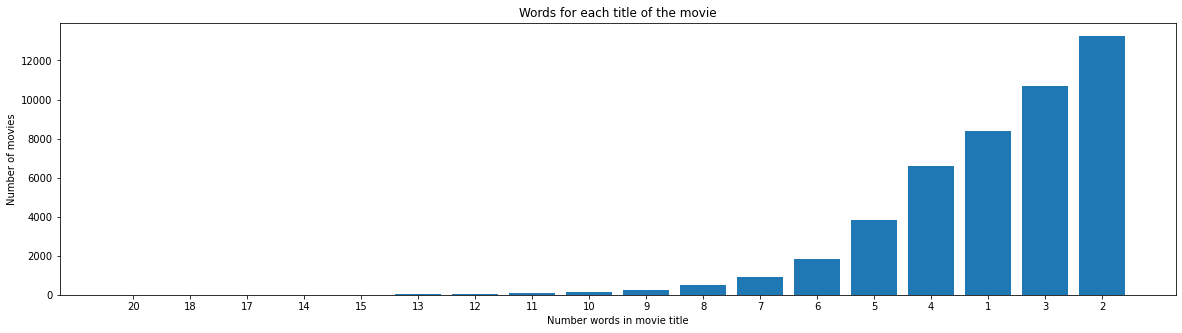

In [70]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
movie_data.fillna('No details available', inplace = True)
word_count = movie_data['title'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of movies')
plt.xlabel('Number words in movie title')
plt.title('Words for each title of the movie')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

1] As we can see here, there are nearly 8500 movies having only one word title.

2] There are movies with words 13, 12 and 11 in their titles (I wonder if they are titles or casts name in it.)


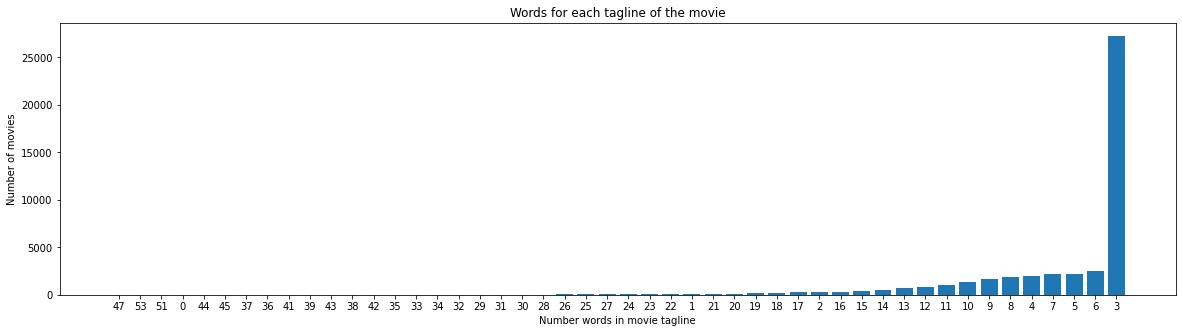

In [71]:
#How to calculate number of words in a string in DataFrame: https://stackoverflow.com/a/37483537/4084039
word_count = movie_data['tagline'].str.split().apply(len).value_counts()
word_dict = dict(word_count)
word_dict = dict(sorted(word_dict.items(), key=lambda kv: kv[1]))


ind = np.arange(len(word_dict))
plt.figure(figsize=(20,5))
p1 = plt.bar(ind, list(word_dict.values()))

plt.ylabel('Number of movies')
plt.xlabel('Number words in movie tagline')
plt.title('Words for each tagline of the movie')
plt.xticks(ind, list(word_dict.keys()))
plt.show()

In [72]:
# Combining all the above statemennts
from tqdm import tqdm
import re


preprocessed_title = []
# tqdm is for printing the status bar
for sentence in tqdm(movie_data['title'].values):
    
    sent = sentence
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    
    
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in sw)
    
    preprocessed_title.append(sent.lower().strip() )  

100%|██████████| 46628/46628 [00:00<00:00, 94146.81it/s]


In [73]:
# Combining all the above statemennts
from tqdm import tqdm
import re


preprocessed_tagline = []
# tqdm is for printing the status bar
for sentence in tqdm(movie_data['tagline'].values):
    
    sent = sentence
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    
    
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in sw)
    
    preprocessed_tagline.append(sent.lower().strip() )  

100%|██████████| 46628/46628 [00:00<00:00, 60739.46it/s]


In [74]:
X = movie_data['title']

0                             Toy Story
1                               Jumanji
2                      Grumpier Old Men
3                     Waiting to Exhale
4           Father of the Bride Part II
                     ...               
9995    National Lampoon's Gold Diggers
9996                      Blind Horizon
9997              Islands in the Stream
9998                      Go for Broke!
9999          The Blood on Satan's Claw
Name: title, Length: 10000, dtype: object

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
text_tfidf_title = vectorizer.fit_transform(X.values)

In [76]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def WC(df,stopwords):
    title = list(movie_data['title'].values)
    tot_text = " "
    for text in title:
        tot_text = tot_text + text
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = sw, 
                min_font_size = 10).generate(tot_text) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)

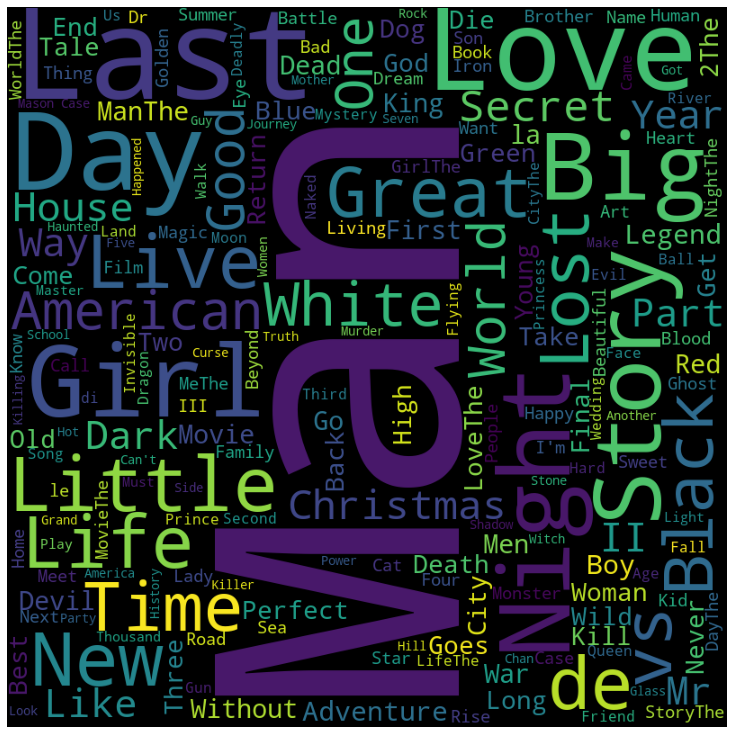

In [77]:
WC(text_tfidf_title,stopwords)

In [78]:
# https://towardsdatascience.com/identify-top-topics-using-word-cloud-9c54bc84d911
all_title = ' '.join(movie_data['title'].str.lower())

In [79]:
import collections
filtered_words = [word for word in all_title.split() if word not in sw]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

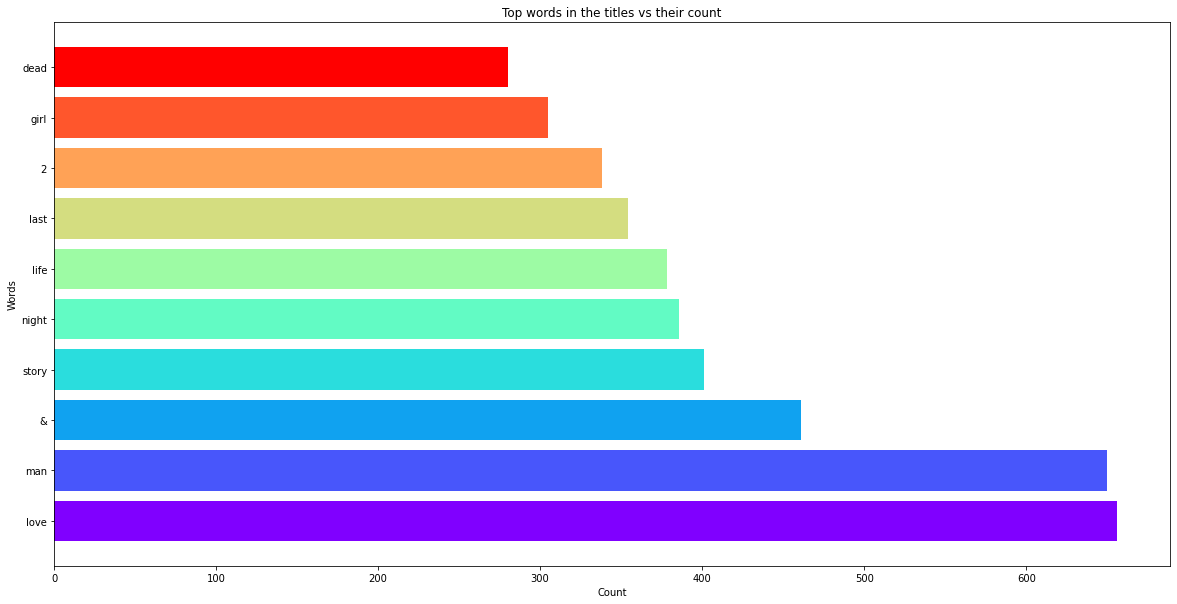

In [80]:
import matplotlib.cm as cm
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the titles vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

In [81]:
X1 = movie_data['tagline']

In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(2, 2), min_df = 3)
text_tfidf_tagline = vectorizer.fit_transform(X1.values)

In [110]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def WC1(df,stopwords):
    tagline = list(movie_data['tagline'].values)
    tot_text = " "
    for text in tagline:
        tot_text = tot_text + text
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = sw, 
                min_font_size = 10).generate(tot_text) 
  
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)

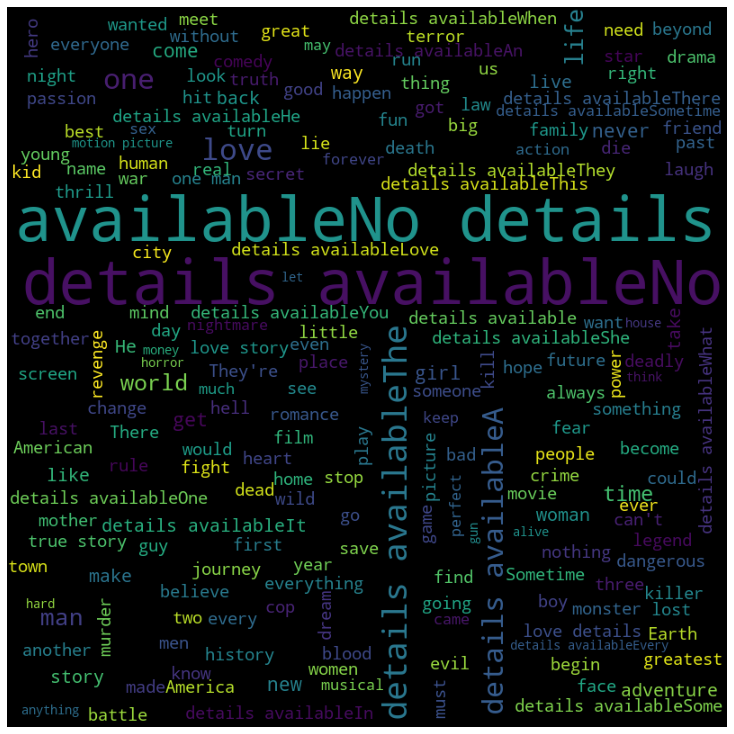

In [111]:
WC1(text_tfidf_tagline,stopwords)

In [112]:
all_tagline = ' '.join(movie_data['tagline'].str.lower())

In [115]:
filtered_words1 = [word for word in all_tagline.split() if word not in sw]
counted_words1 = collections.Counter(filtered_words1)

words1 = []
counts1 = []
for letter1, count1 in counted_words1.most_common(20):
    words1.append(letter1)
    counts1.append(count1)

<BarContainer object of 20 artists>

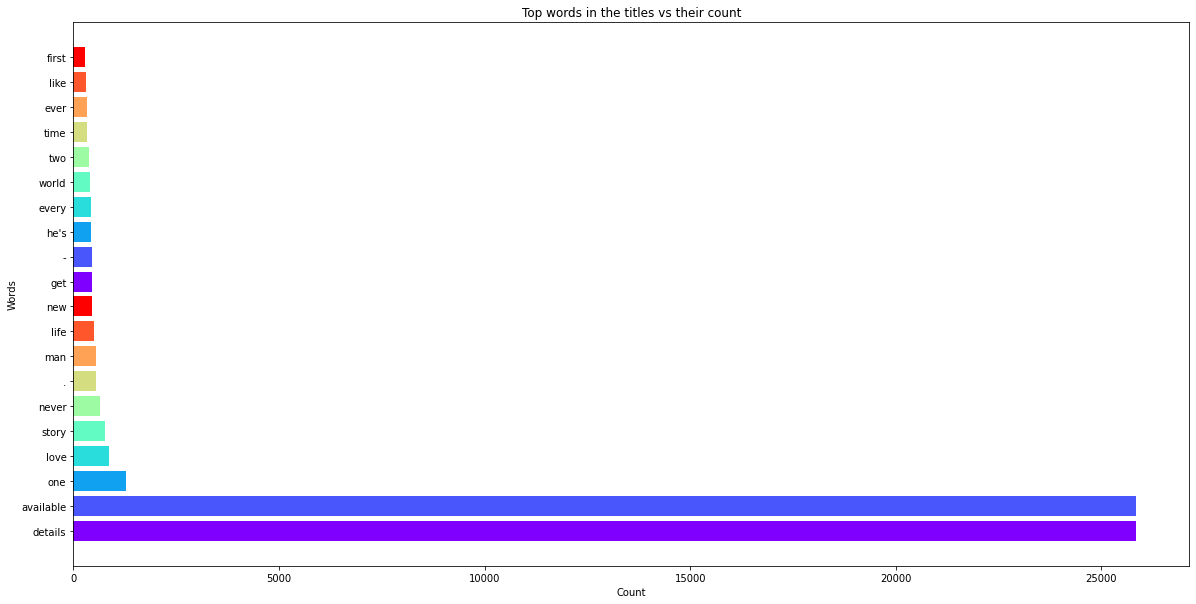

In [116]:
colors1 = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the titles vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words1, counts1, color=colors)